This code will look at the diffusion of autonomous vehicle travel, how it affects vehicle deaths, and plot those values over time

In [17]:
# import the proper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# define the paramaters of the Bass Model
BASS_P = 0.006 # p parameter for Bass model
BASS_Q = 0.7 # q parameter for Bass model
GROWTH = 0.007 # growth of the number of miles travelled
MILES = 3130509 # millions of miles travelled from DOT
REG_RATIO = 0.01054142011 # number of fatalities with regular miles travelled
AV_FRACTION = 0.1 # the percentage of the ratio with automous vehicles

In [19]:
def bass_model(p, q, t):
	"""
	This is the generic Bass model that takes p, q, and computes
	the end result at time t periods from now
	"""
	a = q/p
	b = p+q
	x = math.exp(-1 * b * t)
	y = 1 + a * x
	bass = (b ** 2 * x) / (p * y ** 2)
	return bass

In [20]:
i = 0
miles = [MILES]
new = [0]
avmiles = [0]
regmiles = [(MILES - 1)]
plot_data = []
while i < 30:
    miles.append(miles[i]*(1 + GROWTH))
    i = i + 1
    new.append(bass_model(BASS_P, BASS_Q, i))
    cumulative = np.sum(new)
    avmiles.append(cumulative * miles[i])
    regmiles.append(miles[i] - avmiles[i])
    plot_data.append(np.array(miles[i]).flatten())
deaths =  (np.array(regmiles)*REG_RATIO+np.array(avmiles)*REG_RATIO*AV_FRACTION)

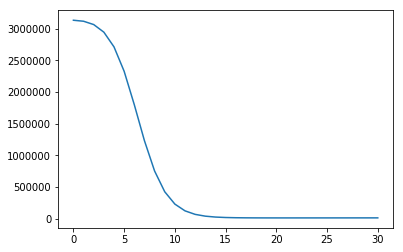

In [21]:
plt.plot(regmiles)
plt.show()

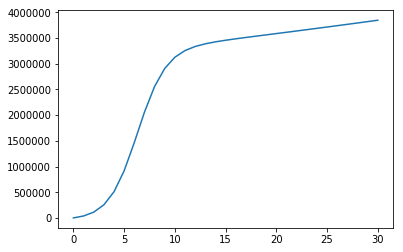

In [22]:
plt.plot(avmiles)
plt.show()

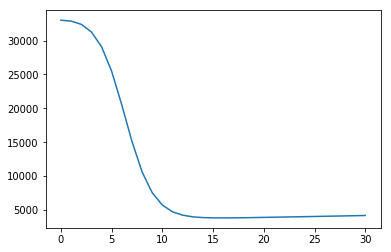

In [23]:
plt.plot(deaths)
plt.show()

In [24]:
print(int(np.sum(deaths)))

324328
